In [3]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [19]:
# Getting images and associated labels

data =[]
labels = []
classes = 43
cur_path ="<working directory filepath>"

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
# Training and test datasets

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
# One hot encoding for labels

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Building the model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [11]:
# Compiling the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
# Training the model

epochs = 20

history = model.fit(X_train, y_train, batch_size = 16, epochs=epochs, validation_data=(X_test, y_test))

model.save("my_model.h5")

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 118s 4ms/step - loss: 0.9006 - accuracy: 0.7320 - val_loss: 0.3387 - val_accuracy: 0.8998
Epoch 2/20
31367/31367 [==============================] - 118s 4ms/step - loss: 0.6216 - accuracy: 0.8094 - val_loss: 0.2223 - val_accuracy: 0.9310
Epoch 3/20
31367/31367 [==============================] - 117s 4ms/step - loss: 0.5347 - accuracy: 0.8377 - val_loss: 0.2240 - val_accuracy: 0.9309
Epoch 4/20
31367/31367 [==============================] - 118s 4ms/step - loss: 0.4819 - accuracy: 0.8561 - val_loss: 0.1630 - val_accuracy: 0.9496
Epoch 5/20
31367/31367 [==============================] - 119s 4ms/step - loss: 0.4514 - accuracy: 0.8698 - val_loss: 0.1602 - val_accuracy: 0.9522
Epoch 6/20
31367/31367 [==============================] - 119s 4ms/step - loss: 0.4096 - accuracy: 0.8807 - val_loss: 0.1302 - val_accuracy: 0.9583
Epoch 7/20
31367/31367 [==============================] - 119s 

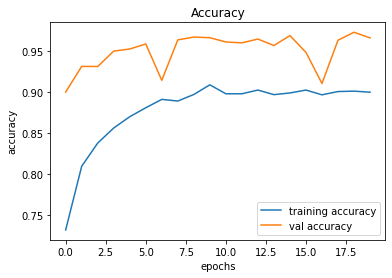

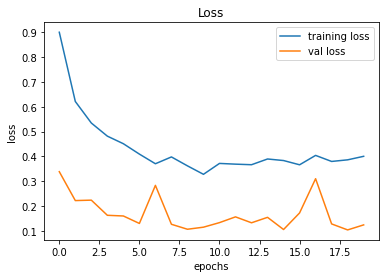

In [15]:
# Plotting training and validation (accuracy and loss) curves

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
# Testing accuracy on test dataset

from sklearn.metrics import accuracy_score

y_test = pd.read_csv("<working directory filepath>/Test.csv")

labels = y_test["ClassId"].values
y_test['Path'] = "<working directory filepath>"+ '/' + y_test['Path']
imgs = y_test["Path"].values

data=[]


In [27]:
imgs

array(['C:/Users/haima/Traffic Sign Recog/Test/00000.png',
       'C:/Users/haima/Traffic Sign Recog/Test/00001.png',
       'C:/Users/haima/Traffic Sign Recog/Test/00002.png', ...,
       'C:/Users/haima/Traffic Sign Recog/Test/12627.png',
       'C:/Users/haima/Traffic Sign Recog/Test/12628.png',
       'C:/Users/haima/Traffic Sign Recog/Test/12629.png'], dtype=object)

In [28]:
cur_path ="C:/Users/haima/Traffic Sign Recog"

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


In [29]:
#Accuracy with the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9167854315122723


In [31]:
# Saving the model

model.save("traffic_classifier.h5")